# Problema de regressão com Redes neurais


## Passo 1: Importar bibliotecas necessárias 

In [6]:
%pip install seaborn
%pip install keras

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
2.11.0


## Preparação dos dados


### Importar dados do CSV


     Entrada   Saída
0        0.0    0.00
1        0.5    0.25
2        1.0    1.00
3        1.5    2.25
4        2.0    4.00
..       ...     ...
212     59.6  780.40
213     59.7  785.80
214     59.8  791.20
215     59.9  796.60
216     60.0  802.00

[217 rows x 2 columns]


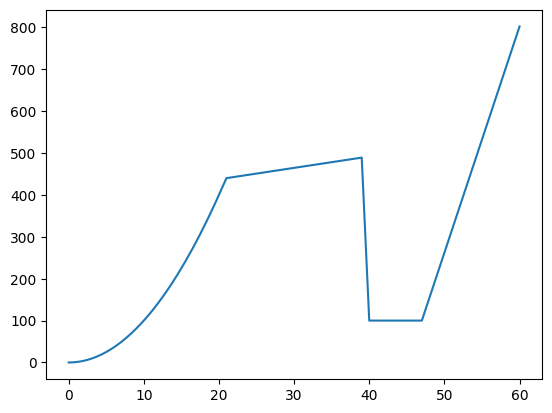

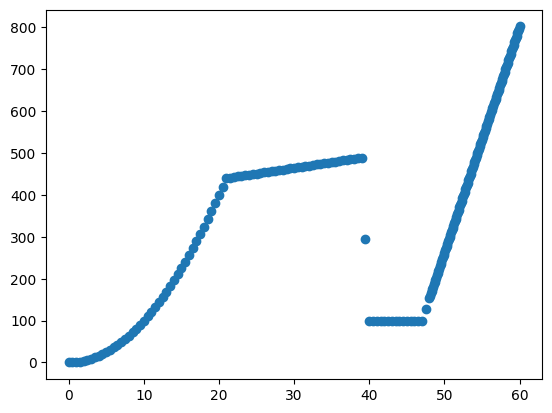

In [7]:
# Importar os dados do CSV
dados = pd.read_csv('./dadosExpandidos.csv')
print(dados)

# Gera gráfico dos dados de entrada e saída
plt.plot(dados['Entrada'], dados['Saída'])

# Cria uma nova figura
plt.figure()

# Gerá gráfico espalhados dos dados de entrada e saída
plt.scatter(dados['Entrada'], dados['Saída'])

### Normalizar dados
Converte os dados para a mesma ordem de grandeza facilitando o treinamento da rede.

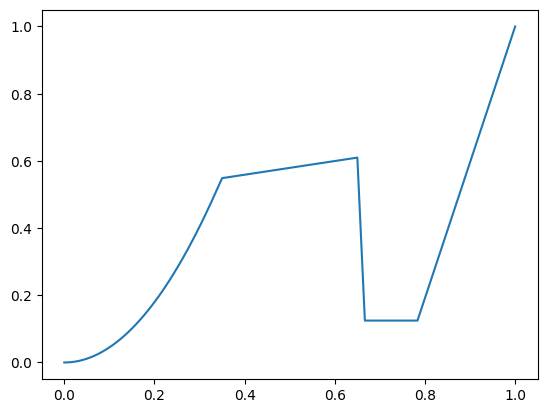

In [8]:
def normalization(x):
    return x / x.abs().max()

x_normal = normalization(dados['Entrada'])
y_normal = normalization(dados['Saída'])

plt.plot(x_normal, y_normal)


## Compilar modelo
Serão proposta para esse trabalho três topologias de rede variando o otimizador e a função de ativação, mas com o mesmo de neurônios e camadas:
1. Faz uso do otimizador RMSprop que consiste em manter uma média móvel do quadrado dos gradientes e dividir o gradiente pela raiz dessa média  
2. Faz uso do otmizador ADAM que é um metódo de descida de gradiente estocástico baseado na estimativa adaptativa de momentos de primeira e segunda ordem 
3. Usa  função  de ativação Sigmoid
    - Função Sigmoid: Comportamento não linear e mais adequada para problemas de classificação devido a sua derivada ser máxima no zero
    - Função Relu: Retorna 0 para valores negativos e o próprio valor para positivos.Tão rápida velocidade de treinamento, mas apaga dados negativos.

![Função Relu](Imagens/Relu.png)
![Função Sigmoid](Imagens/Sigmoid.png)



In [9]:
def build_model_1():

    # Define a topologia da rede em relação a numero de camadas e suas características
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(None, 1)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(units=1,activation='linear')
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    # Compila o modelo definindo a função de perda e as métricas que serão utilizadas
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

    return model


def build_model_2():

    # Define a topologia da rede em relação a numero de camadas e suas características
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(None, 1)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(units=1,activation='linear')
    ])


    # Compila o modelo definindo a função de perda e as métricas que serão utilizadas
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

    return model


def build_model_3():

    # Define a topologia da rede em relação a numero de camadas e suas características
    model = keras.Sequential([
        layers.Dense(64, activation='sigmoid', input_shape=(None, 1)),
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(units=1,activation='linear')
    ])


    # Compila o modelo definindo a função de perda e as métricas que serão utilizadas
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

    return model

model_1 = build_model_1()
model_2 = build_model_2()
model_3 = build_model_3()

2022-12-18 18:02:03.606009: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-18 18:02:03.606697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 18:02:03.606842: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-18 18:02:03.606970: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-18 18:02:03.607077: W tensorflow/c

## Treinar modelo
Nessa etapa de treinamento será usado uma função callback 'printDot' para sinalizar a execução do treinamento. O modelo será treinando por 1000 epochs e serão separados 20% dos dados para validação da rede

In [10]:
class printDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')


history_1 = model_1.fit(x_normal, y_normal, epochs=3000, validation_split=0.2, verbose=0, callbacks=[printDot()])
history_2 = model_2.fit(x_normal, y_normal, epochs=3000, validation_split=0.2, verbose=0, callbacks=[printDot()])
history_3 = model_3.fit(x_normal, y_normal, epochs=3000, validation_split=0.2, verbose=0, callbacks=[printDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

## Analisar modelo 
### Análise do MSE e MAE

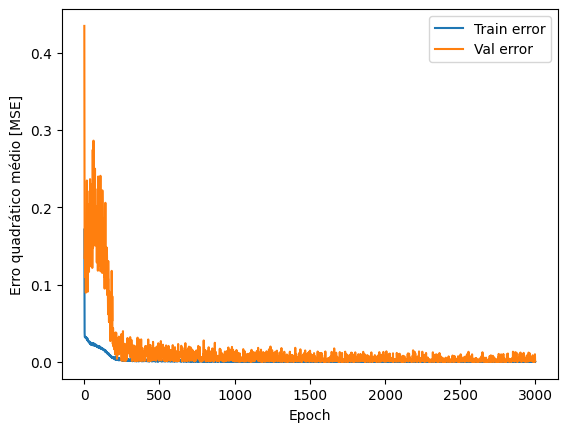

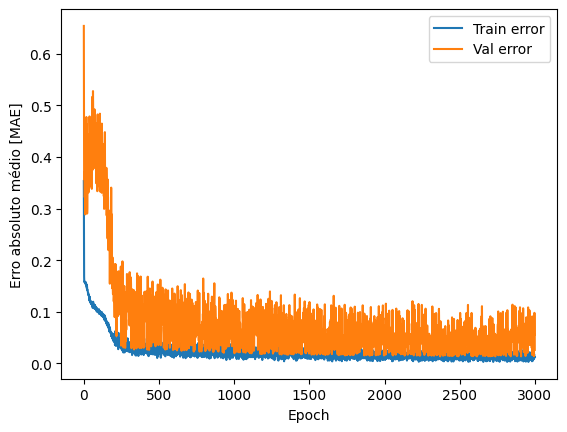

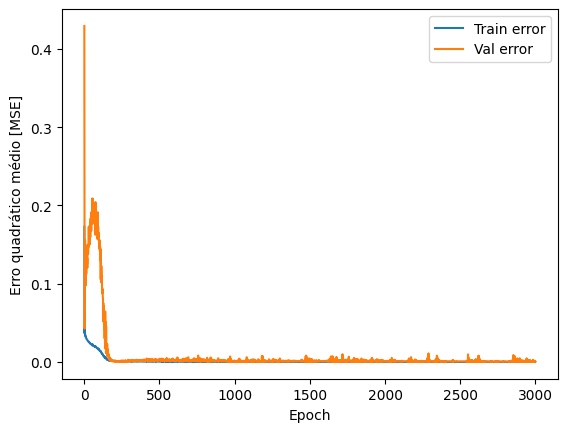

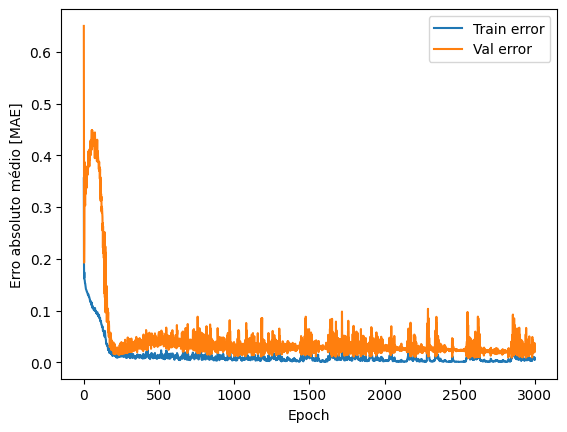

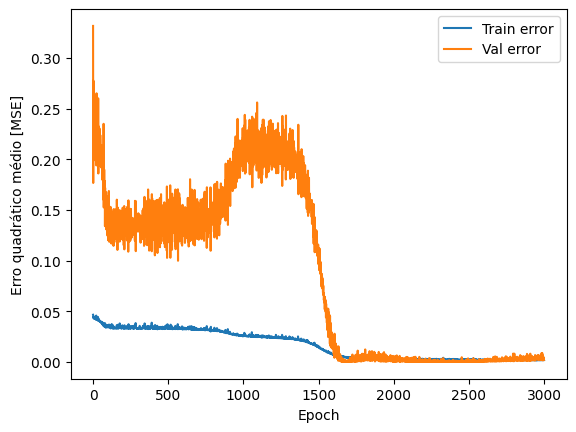

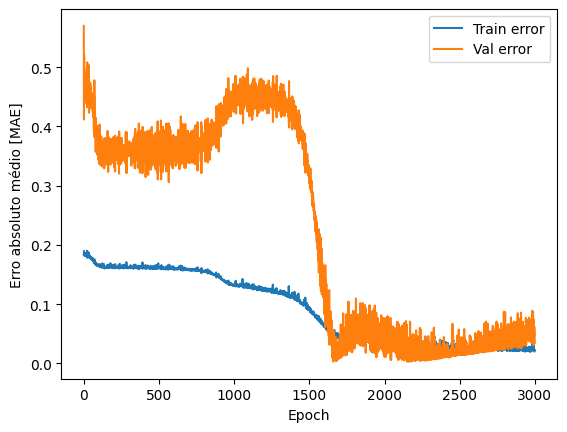

In [11]:

def printMAE(hist):
    # Gráfico do MAE no decorrer das epochs
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Erro absoluto médio [MAE]')
    # Curva com os dados de treinamento
    plt.plot(hist['epoch'], hist['mae'], label='Train error')
    # Curva com os dadosde validação 
    plt.plot(hist['epoch'], hist['val_mae'], label='Val error')
    plt.legend()

    plt.show()

def printMSE(hist):
    # Gráfico do MSE no decorrer das epochs
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Erro quadrático médio [MSE]')
    # Curva com os dados de treinamento
    plt.plot(hist['epoch'], hist['mse'], label='Train error')
    # Curva com os dadosde validação 
    plt.plot(hist['epoch'], hist['val_mse'], label='Val error')
    plt.legend()

    plt.show()

# Cria uma janela de dados a partir do objeto com a acurácia do modelo
hist_1 = pd.DataFrame(history_1.history)
hist_1['epoch'] = history_1.epoch

hist_2 = pd.DataFrame(history_2.history)
hist_2['epoch'] = history_2.epoch

hist_3 = pd.DataFrame(history_3.history)
hist_3['epoch'] = history_3.epoch

printMSE(hist_1)
printMAE(hist_1)

printMSE(hist_2)
printMAE(hist_2)

printMSE(hist_3)
printMAE(hist_3)

### Análise da curva 


7/7 [==============================] - 0s 2ms/step


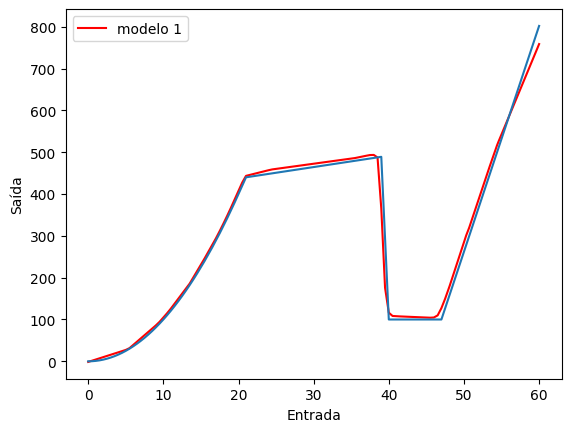

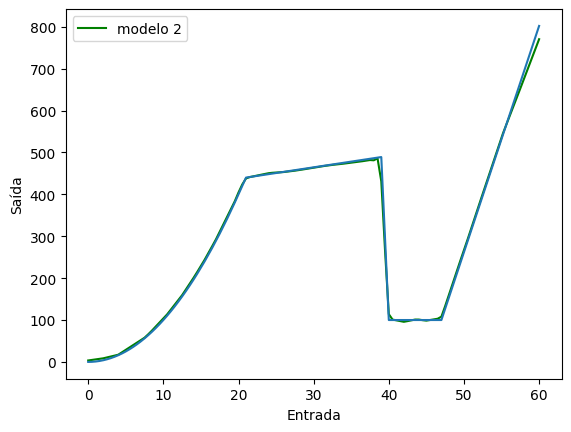

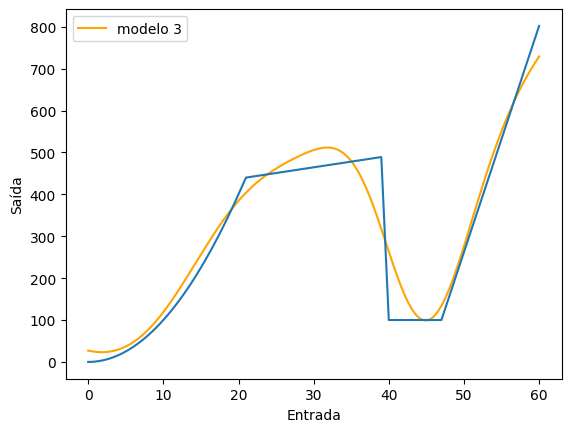

In [15]:

# Gera a previsão dos dados a partir da entrada
y_prevision1 = model_1.predict(x_normal)
y_prevision2 = model_2.predict(x_normal)
y_prevision3 = model_3.predict(x_normal)

plt.plot(dados['Entrada'], y_prevision1[:,:,0]* dados['Saída'].abs().max(), color='red', label='modelo 1')
plt.plot(dados['Entrada'], dados['Saída'])
plt.xlabel('Entrada')
plt.ylabel('Saída')
plt.legend()
plt.show()

plt.plot(dados['Entrada'], y_prevision2[:,:,0]* dados['Saída'].abs().max(), color='green', label='modelo 2')
plt.plot(dados['Entrada'], dados['Saída'])
plt.xlabel('Entrada')
plt.ylabel('Saída')
plt.legend()
plt.show()

plt.plot(dados['Entrada'], y_prevision3[:,:,0]* dados['Saída'].abs().max(), color='orange', label='modelo 3')
plt.plot(dados['Entrada'], dados['Saída'])
plt.xlabel('Entrada')
plt.ylabel('Saída')
plt.legend()
plt.show()


## Salvar modelo
A partir do exposto acima, chega-se a conclusão que o modelo 2 é o melhor. Dessa forma, ele será salvo e usado em outro script para perver os dados de entrada. 

In [14]:
model_2.save('modelo.h5')